<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
housing_data = pd.read_csv('/content/Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing_data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##**Data Encoding**

In [ ]:
# Encoding
# List of categorical columns containing 'yes' and 'no' values
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Replace "yes" with 1 and "no" with 0 in the specified column(s)
housing_data[categorical_col] = housing_data[categorical_col].replace({'yes': 1, 'no': 0}).astype(int)



<ipython-input-8-6436db261b85>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_data[categorical_col] = housing_data[categorical_col].replace({'yes': 1, 'no': 0}).astype(int)


In [ ]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
housing_data['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [ ]:
# one-hot encoding and dropping the first column to avoid multicollinearity
status = pd.get_dummies(housing_data['furnishingstatus'], drop_first=True).astype(int)

In [ ]:
# joining the dummy columns to the dataset
housing_data = pd.concat([housing_data, status], axis = 1)

# dropping furnishing status
housing_data.drop(['furnishingstatus'], axis = 1, inplace = True)

housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


##**Data Analysis**

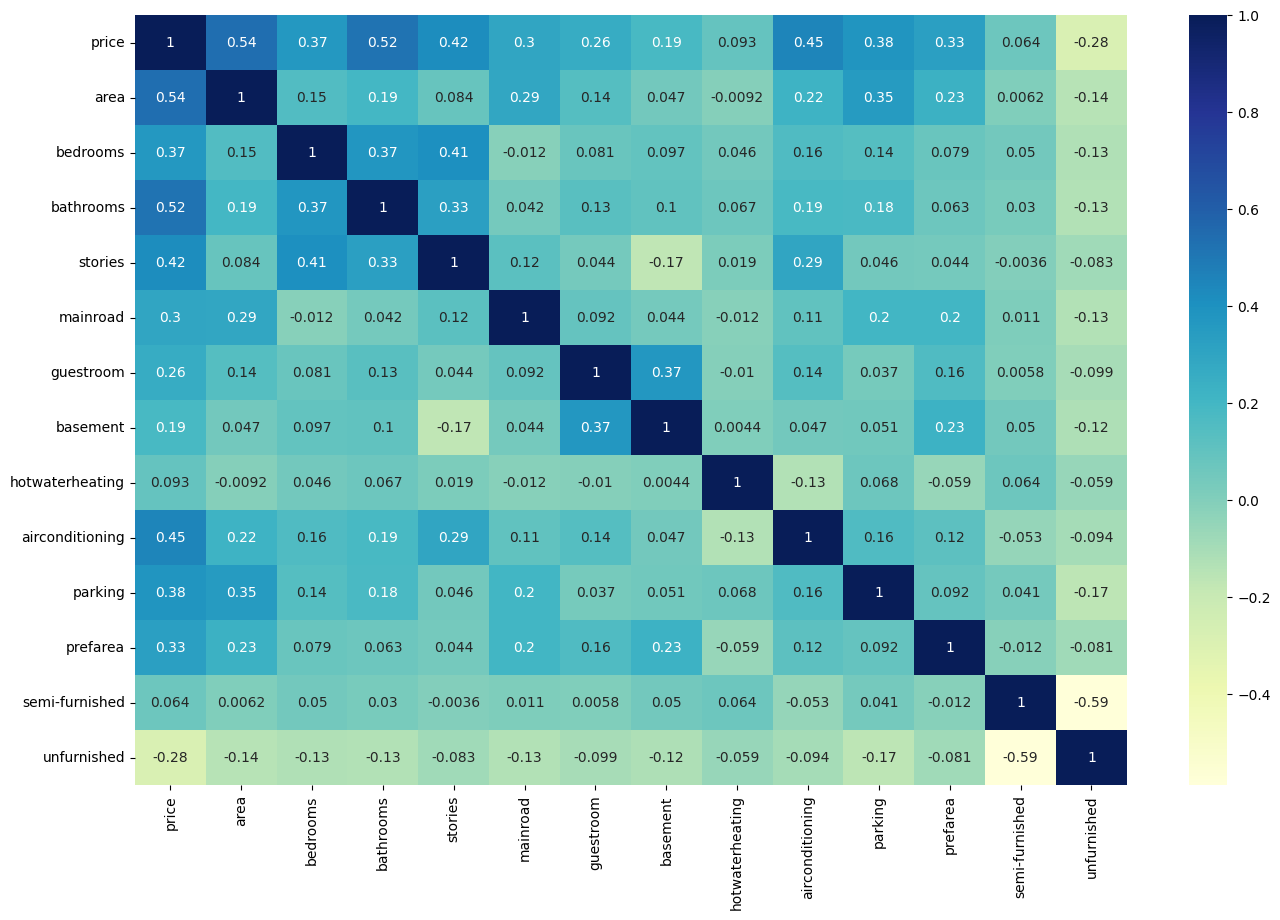

In [ ]:
# correlation of variables
plt.figure(figsize = (16, 10))
sns.heatmap(housing_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

##**Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Defining Feature and Target variables
X = housing_data.drop('price', axis=1)
y = housing_data['price']

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Regression on the train dtaset
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions on the test dataset
y_pred = regr.predict(X_test)
y_pred

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.32722559, 3294646.25725955, 3532275.09556558,
       5611774.56836476, 6368145.98732718, 2722856.95689985,
       2629405.61585782, 9617039.5031558 , 2798087.30447888,
       3171096.76847063, 3394639.09125528, 3681088.65424275,
       5263187.74621485, 3035963.47612384, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.21395649,
       5886993.57919883, 2730836.19518458, 4727316.47323635,
       5244847.52716801, 7555324.21605603, 3220790.84680268,
       5191898.79934206, 8143726.91009786, 3398814.09825035,
       6490693.05027925, 3315105.9074781 , 6708457.36761326,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613261, 3191242.95701508,
       4596554.93225238, 4566042.86048411, 3517779.52374148,
       7205844.79365835, 3983597.27861103, 3749338.70271056,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397126,

In [ ]:
#The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


In [ ]:
#The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 1754318687330.6633


In [ ]:
#The intercept
print('Intercept', regr.intercept_)

Intercept 260032.35760741122


In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.6529242642153185


In [ ]:
# Step 1: Input data for prediction
new_house_data = {
    'area': 10000,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 2,
    'mainroad': 1,
    'guestroom':1,
    'basement':1,
    'hotwaterheating':1,
    'airconditioning':1,
    'parking':2,
    'prefarea':1,
    'semi-furnished':0,
    'unfurnished':0
}

# Step 2: Convert the input to a DataFrame for compatibility
input_data = pd.DataFrame([new_house_data])

# Step 3: Predict house price
predicted_price = regr.predict(input_data)

# Step 4: Display the result
print(f"The predicted price of the house is: ${predicted_price[0]:,.2f}")

The predicted price of the house is: $10,570,554.93


In [ ]:
model2 = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
model2 = model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean Squared error: 5.787524836118459e+32
R2 score: -1.1450082903262832e+20
